371 463 3


(np.float64(-0.5), np.float64(462.5), np.float64(370.5), np.float64(-0.5))

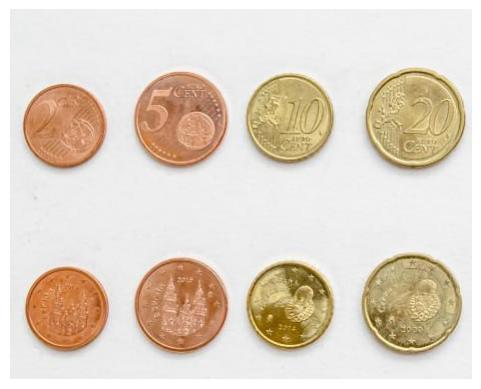

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

bgr = cv2.imread("penny.jpg")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

h, w, c = rgb.shape
print(h, w, c)

plt.imshow(rgb)
plt.axis("off")


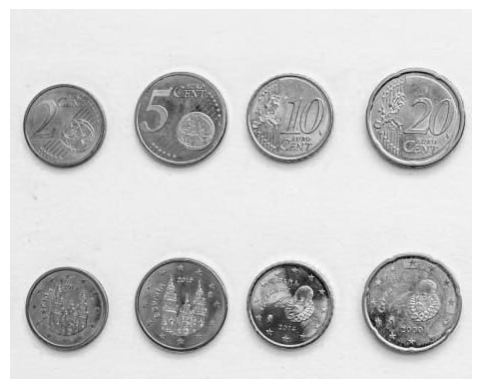

In [2]:
gray_penny = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.axis("off")
plt.imshow(gray_penny, cmap="gray")

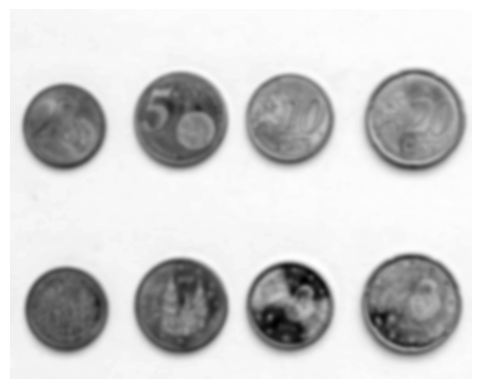

In [3]:
blur_penny = cv2.GaussianBlur(gray_penny, (11,11), 0)
plt.axis("off")
plt.imshow(blur_penny, cmap='gray')

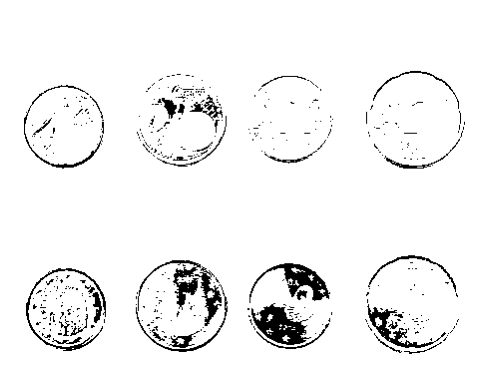

In [4]:
_, binary_penny = cv2.threshold(gray_penny, 130, 255, cv2.THRESH_BINARY)
plt.axis("off")
plt.imshow(binary_penny, cmap="gray")

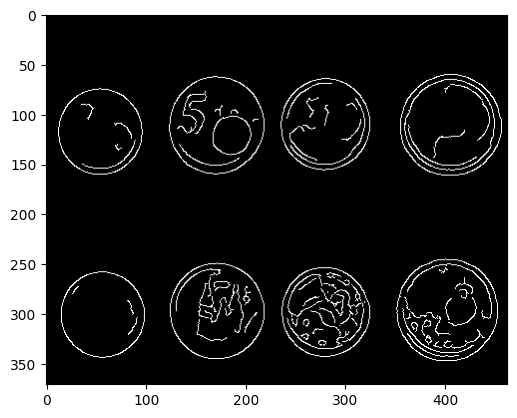

In [5]:
canny_penny = cv2.Canny(blur_penny, 30, 60)
plt.imshow(canny_penny, cmap="gray")

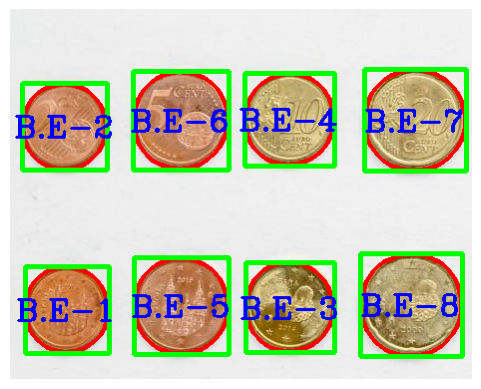

In [6]:
contours, hierarchy = cv2.findContours(canny_penny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_penny = cv2.drawContours(rgb.copy(), contours, -1, (255,0,0), 3)

fields = [(cv2.contourArea(contour), i, contour) for i, contour in enumerate(contours)]

fields.sort()

for queue, (field, i, contour) in enumerate(fields):
    if field > 5600:  
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(contours_penny, (x, y), (x + w, y + h), (0, 255, 0), 3)
        text_size, _ = cv2.getTextSize(f"B.E-{queue}", cv2.FONT_HERSHEY_COMPLEX, 1, 2)
        text_width, text_height = text_size

        centre_x = x + (w - text_width) // 2
        centre_y = y + (h + text_height) // 2

        cv2.putText(contours_penny, f"B.E-{queue+1}", (centre_x, centre_y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

cv2.imwrite("contours_penny.jpg", cv2.cvtColor(contours_penny, cv2.COLOR_BGR2RGB))
plt.imshow(contours_penny)
plt.axis("off")
plt.show()